# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy
import os 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import *
import sys
from pylab import *
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

%matplotlib inline

os.getcwd()

'/Users/HudsonCavanagh/GA_dsi-projects/projects/7th'

#### Step 2: Examine your data 

In [2]:
airports = pd.read_csv('/Users/HudsonCavanagh/Documents/airports.csv')
ops = pd.read_csv('/Users/HudsonCavanagh/Documents/Airport_operations.csv')
cancelations = pd.read_csv('/Users/HudsonCavanagh/Documents/airport_cancellations.csv')

airports.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [3]:
airports['AP Type'].value_counts() # way more public use than federal/ commercial (95%)

Public Use                4876
Federalized/Commercial     288
Name: AP Type, dtype: int64

In [4]:
print(len(ops), len(cancelations))

(841, 805)


In [5]:
ops['str_year'] = ops['year'].apply(lambda x: str(int(x)))
ops['airport_year'] = ops['airport'] + ops['str_year']
ops['airport_year']


0      ABQ2004
1      ABQ2005
2      ABQ2006
3      ABQ2007
4      ABQ2008
5      ABQ2009
6      ABQ2010
7      ABQ2011
8      ABQ2012
9      ABQ2013
10     ABQ2014
11     ANC2004
12     ANC2005
13     ANC2006
14     ANC2007
15     ANC2008
16     ANC2009
17     ANC2010
18     ANC2011
19     ANC2012
20     ANC2013
21     ANC2014
22     ATL2004
23     ATL2005
24     ATL2006
25     ATL2007
26     ATL2008
27     ATL2009
28     ATL2010
29     ATL2011
        ...   
811    TPA2007
812    TPA2008
813    TPA2009
814    TPA2010
815    TPA2011
816    TPA2012
817    TPA2013
818    TPA2014
819    TUS2004
820    TUS2005
821    TUS2006
822    TUS2007
823    TUS2008
824    TUS2009
825    TUS2010
826    TUS2011
827    TUS2012
828    TUS2013
829    TUS2014
830    VNY2004
831    VNY2005
832    VNY2006
833    VNY2007
834    VNY2008
835    VNY2009
836    VNY2010
837    VNY2011
838    VNY2012
839    VNY2013
840    VNY2014
Name: airport_year, dtype: object

In [6]:
cancelations

cancelations['str_year'] = cancelations['Year'].apply(lambda x: str(int(x)))
cancelations['airport_year'] = cancelations['Airport'] + cancelations['str_year']
cancelations['airport_year']

0      ABQ2004
1      ABQ2005
2      ABQ2006
3      ABQ2007
4      ABQ2008
5      ABQ2009
6      ABQ2010
7      ABQ2011
8      ABQ2012
9      ABQ2013
10     ABQ2014
11     ANC2004
12     ANC2005
13     ANC2006
14     ANC2007
15     ANC2008
16     ANC2009
17     ANC2010
18     ANC2011
19     ANC2012
20     ANC2013
21     ANC2014
22     ATL2004
23     ATL2005
24     ATL2006
25     ATL2007
26     ATL2008
27     ATL2009
28     ATL2010
29     ATL2011
        ...   
775    SWF2007
776    SWF2008
777    SWF2009
778    SWF2010
779    SWF2011
780    SWF2012
781    SWF2013
782    SWF2014
783    TPA2004
784    TPA2005
785    TPA2006
786    TPA2007
787    TPA2008
788    TPA2009
789    TPA2010
790    TPA2011
791    TPA2012
792    TPA2013
793    TPA2014
794    TUS2004
795    TUS2005
796    TUS2006
797    TUS2007
798    TUS2008
799    TUS2009
800    TUS2010
801    TUS2011
802    TUS2012
803    TUS2013
804    TUS2014
Name: airport_year, dtype: object

In [7]:
ops.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,str_year,airport_year
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,2004,ABQ2004
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,2005,ABQ2005
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,2006,ABQ2006
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,2007,ABQ2007
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,2008,ABQ2008


In [8]:
df = pd.merge(ops, cancelations, how='left', on='airport_year')
df = pd.merge(df, airports,how='left', left_on='airport', right_on='LocID')
df.head()

df.drop(['str_year_x', 'str_year_y', 'Airport', 'Year', 'airport_year'], axis=1, inplace=1)

num_port = {}
for i,v in enumerate(set(df['airport'])):
    num_port[v] = i

df['airport_num'] = df['airport'].apply(lambda x: num_port[x])
# df['airport_num'].value_counts() #58 and 73 don't have 11
# df[df['airport_num']==58] #no 2004-2007 data for these airports. 
# df[df['airport_num']==73]

In [9]:
df.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,airport_num
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,...,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,...,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,...,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,...,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,...,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44


In [10]:
df.isnull().sum() #last 4 from cancelations have nulls

airport                                0
year                                   0
departures for metric computation      0
arrivals for metric computation        0
percent on-time gate departures        0
percent on-time airport departures     0
percent on-time gate arrivals          0
average_gate_departure_delay           0
average_taxi_out_time                  0
average taxi out delay                 0
average airport departure delay        0
average airborne delay                 0
average taxi in delay                  0
average block delay                    0
average gate arrival delay             0
Departure Cancellations               42
Arrival Cancellations                 42
Departure Diversions                  42
Arrival Diversions                    42
Key                                    0
LocID                                  0
AP_NAME                                0
ALIAS                                  0
Facility Type                          0
FAA REGION      

In [11]:
# df[df.isnull().any(axis=1)] #prints the nan rows
df['airport'][df.isnull().any(axis=1)].unique() #prints the names of the airports I'm dropping
#gary near chicago in IN, ventura california, rockford in chicago, TEB in NJ, VNY in LA, CA. Doesn't seem like I'm losing a ton by dropping these

df.dropna(axis=0, how='any', inplace=1)
len(df)

799

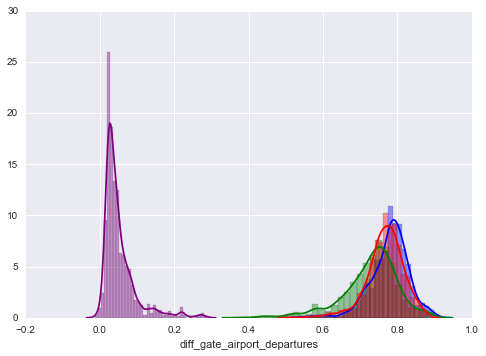

In [12]:
import seaborn as sns

df['diff_gate_airport_departures'] = df['percent on-time gate departures'] - df['percent on-time airport departures']
df['diff_gate_airport_departures']

sns.distplot(df['percent on-time gate departures'], color="blue")
sns.distplot(df['percent on-time airport departures'], color="green")
sns.distplot(df['percent on-time gate arrivals'], color="red")
sns.distplot(df['diff_gate_airport_departures'], color="purple")


In [13]:
# df['Departure Cancellations'].value_counts()

### Intro: Write a problem statement / aim for this project

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [14]:
#Will return to this later in week

Load our csv files into tables

Join airport_cancellations.csv and airports.csv into one table

In [15]:
#HOW??

Query the database for our intial data

#### 1.2 What are the risks and assumptions of our data? 

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [16]:
df.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions', u'Key', u'LocID',
       u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION', u'COUNTY',
       u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available', u'airport_num',
       u'diff_gate_airport_departures'],
      dtype='object')

In [17]:
# df.describe().columns#


# orig_index(['year', 'departures for metric computation',
#        'arrivals for metric computation', 'percent on-time gate departures',
#        'percent on-time airport departures', 'percent on-time gate arrivals',
#        'average_gate_departure_delay', 'average_taxi_out_time',
#        'average taxi out delay', 'average airport departure delay',
#        'average airborne delay', 'average taxi in delay',
#        'average block delay', 'average gate arrival delay',
#        'Departure Cancellations', 'Arrival Cancellations',
#        'Departure Diversions', 'Arrival Diversions', 'Key', 'Latitude',
#        'Longitude', 'airport_num', 'diff_gate_airport_departures'],
#       dtype='object')

In [18]:
decade_agg_ap = pd.pivot_table(df, index='airport')
grouped_years = pd.pivot_table(df, index='year')

In [19]:
import seaborn as sns

# sns.pairplot(decade_agg_ap.describe().iloc[:,10:-1])

In [20]:
# sns.pairplot(grouped_years.describe().iloc[:,10:-1])

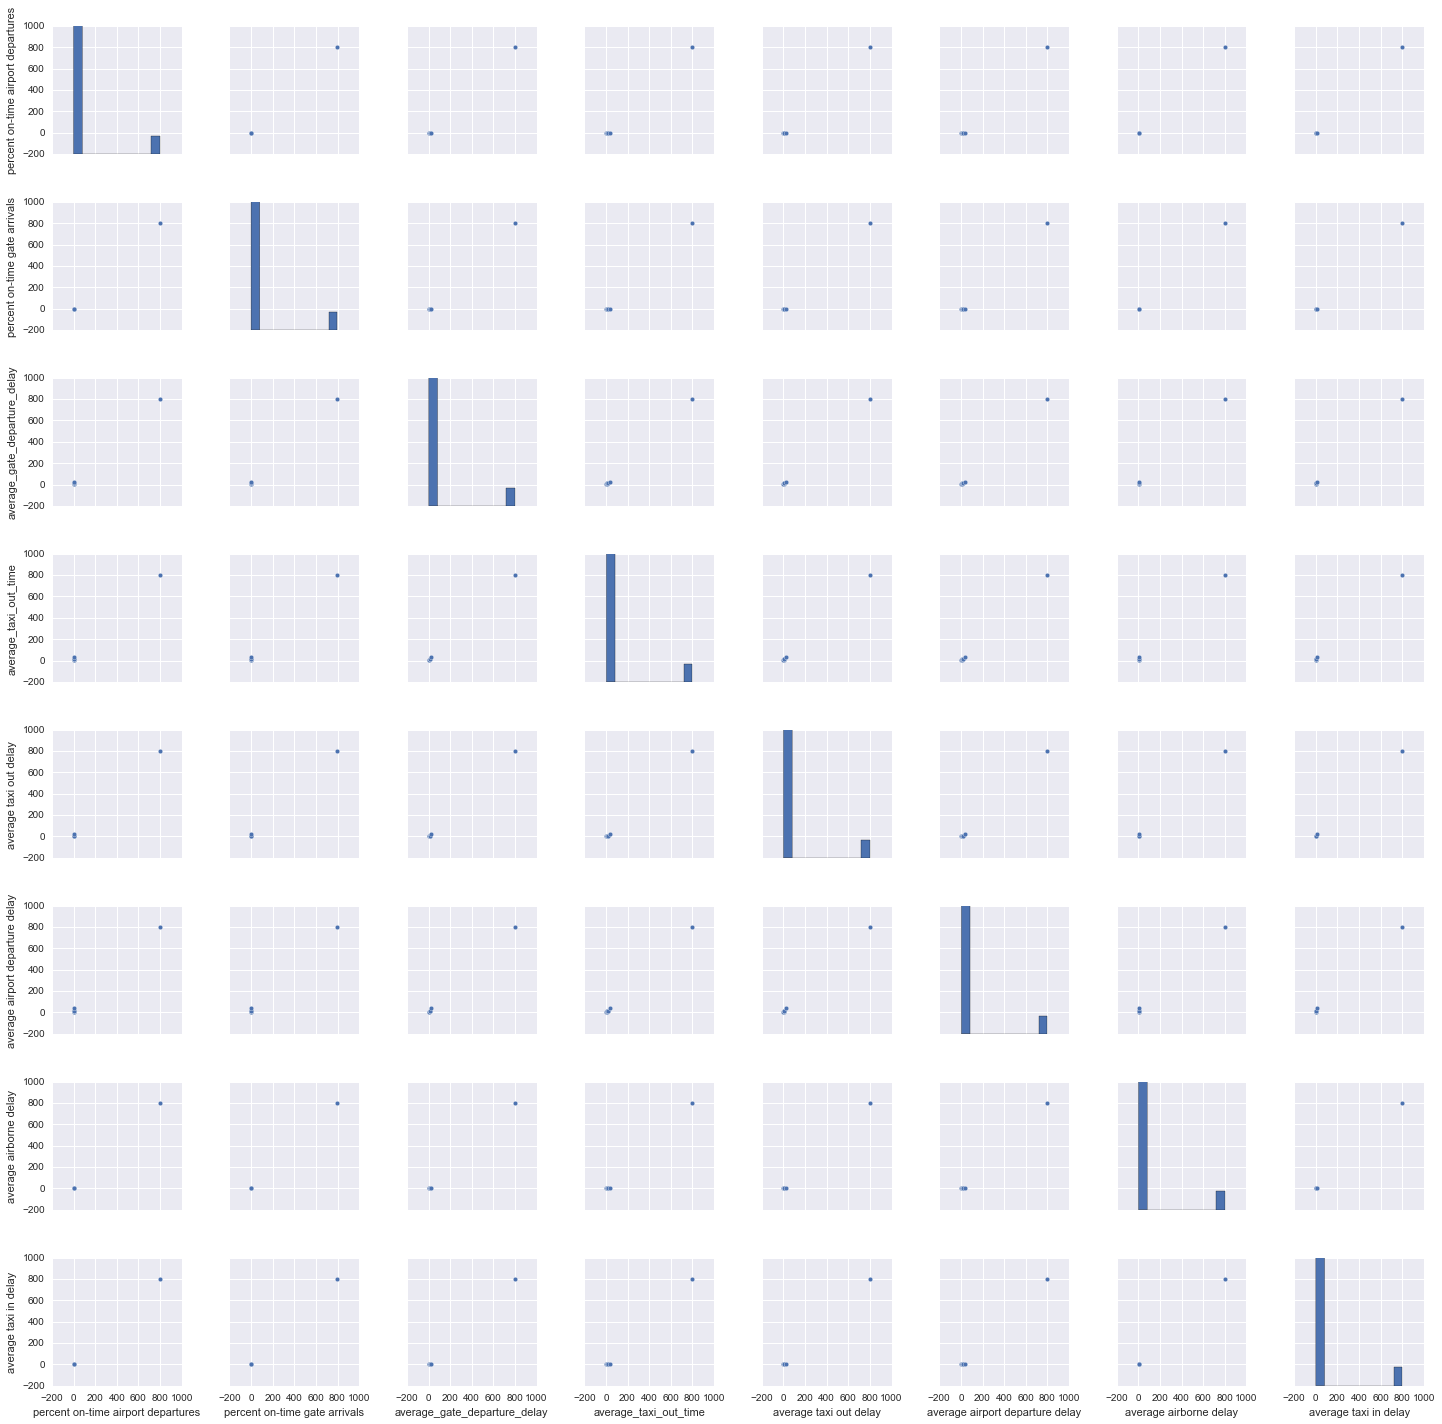

In [21]:
sns.pairplot(df.describe().iloc[:,4:12])

#### Are there any unique values? 

In [22]:
grouped_years['Year'] = grouped_years.index
grouped_years

,Arrival Cancellations,Arrival Diversions,Departure Cancellations,Departure Diversions,Key,Latitude,Longitude,airport_num,arrivals for metric computation,average airborne delay,...,average taxi in delay,average taxi out delay,average_gate_departure_delay,average_taxi_out_time,departures for metric computation,diff_gate_airport_departures,percent on-time airport departures,percent on-time gate arrivals,percent on-time gate departures,Year
year,,,,,,,,,,,,,,,,,,,,,
2004,1487.070423,160.887324,1439.000000,160.676056,1735.281690,36.396961,-94.574346,37.633803,118353.070423,3.390986,...,1.253803,4.015915,11.955493,13.886197,118986.211268,0.053428,0.733166,0.768585,0.786594,2004
2005,1546.422535,164.169014,1501.323944,166.140845,1735.281690,36.396961,-94.574346,37.633803,126686.000000,3.322394,...,1.516197,4.023662,12.728732,13.810563,127418.563380,0.053628,0.718992,0.758573,0.772620,2005
2006,1384.486111,193.097222,1344.069444,186.819444,1727.361111,36.477495,-94.498275,37.777778,121796.638889,3.242500,...,1.458333,4.166389,13.125833,14.144444,122675.000000,0.057726,0.710628,0.748257,0.768354,2006
2007,1781.567568,196.918919,1732.513514,190.891892,1697.729730,36.471686,-95.161801,38.527027,120772.243243,3.346486,...,1.657838,4.469730,14.282297,14.573108,121056.864865,0.066832,0.691212,0.731392,0.758045,2007
2008,1542.216216,195.851351,1495.324324,196.594595,1697.729730,36.471686,-95.161801,38.527027,115291.175676,3.144595,...,1.461216,4.015270,13.453243,14.359730,115622.216216,0.057545,0.719423,0.755453,0.776968,2008
2009,1011.739726,170.835616,969.205479,180.054795,1705.027397,36.393279,-95.244877,38.397260,108056.849315,2.884658,...,1.379452,3.606301,11.664384,13.968767,108484.246575,0.051338,0.751647,0.789962,0.802985,2009
2010,1292.123288,170.287671,1247.931507,179.849315,1705.027397,36.393279,-95.244877,38.397260,107772.767123,2.734384,...,1.407260,3.393562,12.170685,13.668767,108230.835616,0.049179,0.742793,0.784225,0.791973,2010
2011,1328.150685,161.342466,1293.068493,171.013699,1712.534247,36.502794,-94.832411,38.479452,107818.452055,2.580137,...,1.291918,3.153836,12.714658,13.477397,108212.575342,0.043723,0.743247,0.780868,0.786970,2011
2012,906.575342,137.575342,878.356164,147.904110,1712.534247,36.502794,-94.832411,38.479452,106035.589041,2.242877,...,1.325068,3.009315,11.884932,13.302877,106332.890411,0.041678,0.756963,0.797562,0.798641,2012


### Part 3: Data Mining

#### 3.1 Create Dummy Variables

In [23]:
#Goal analysis:
#1: df - airport-years, find patterns
#2: decade_agg_ap - by airport over entire decade
#3: grouped_years - by year to see trends over time


#### 3.2 Format and Clean the Data

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

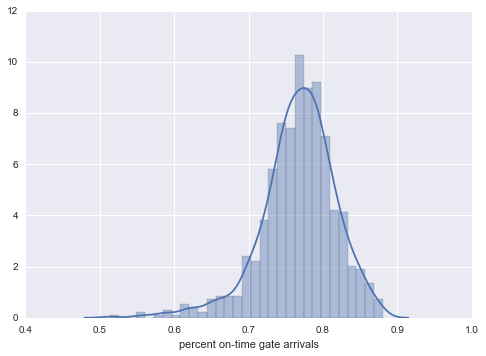

In [24]:
sns.distplot(df['percent on-time gate arrivals'])

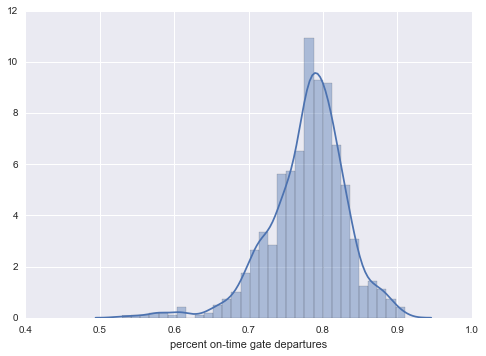

In [25]:
sns.distplot(df.iloc[:,4])

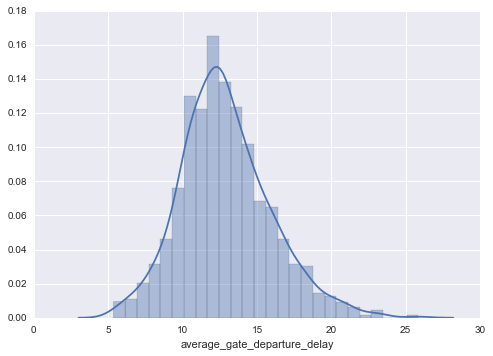

In [26]:
sns.distplot(df.iloc[:,7])

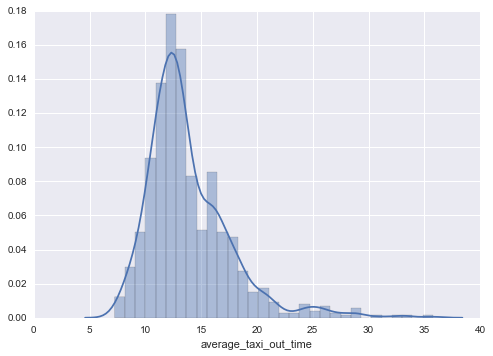

In [27]:
sns.distplot(df.iloc[:,8])

#### 4.2 Find correlations in the data

In [28]:
# variables for analysis:
#1: df - airport-years, find patterns
#2: decade_agg_ap - by airport over entire decade
#3: grouped_years

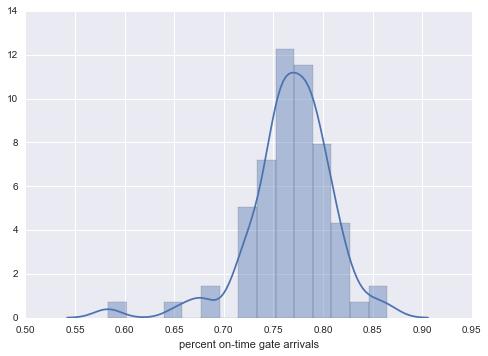

In [29]:
sns.distplot(decade_agg_ap['percent on-time gate arrivals'])

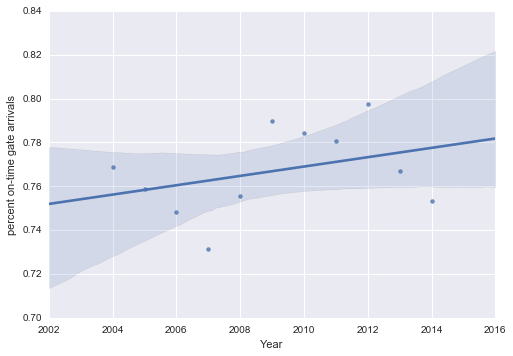

In [30]:
sns.regplot(grouped_years['Year'], grouped_years['percent on-time gate arrivals'])
#slightly positive trend in terms of ontime gate arrivals

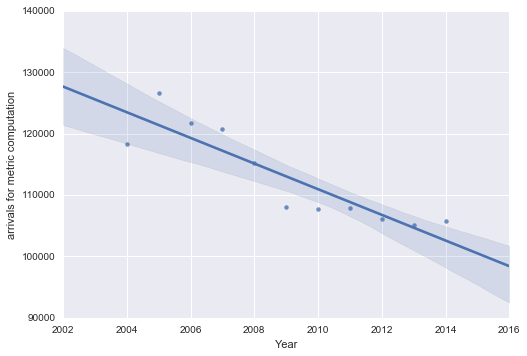

In [31]:
sns.regplot(grouped_years['Year'], grouped_years.iloc[:,8])
#slight decrease in aavg. arrival delay

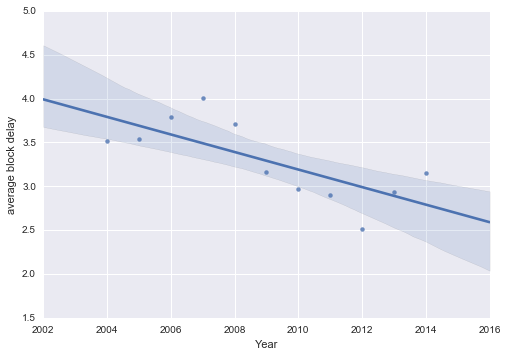

In [32]:
sns.regplot(grouped_years['Year'], grouped_years.iloc[:,11])
#slight decrease in aavg. arrival delay

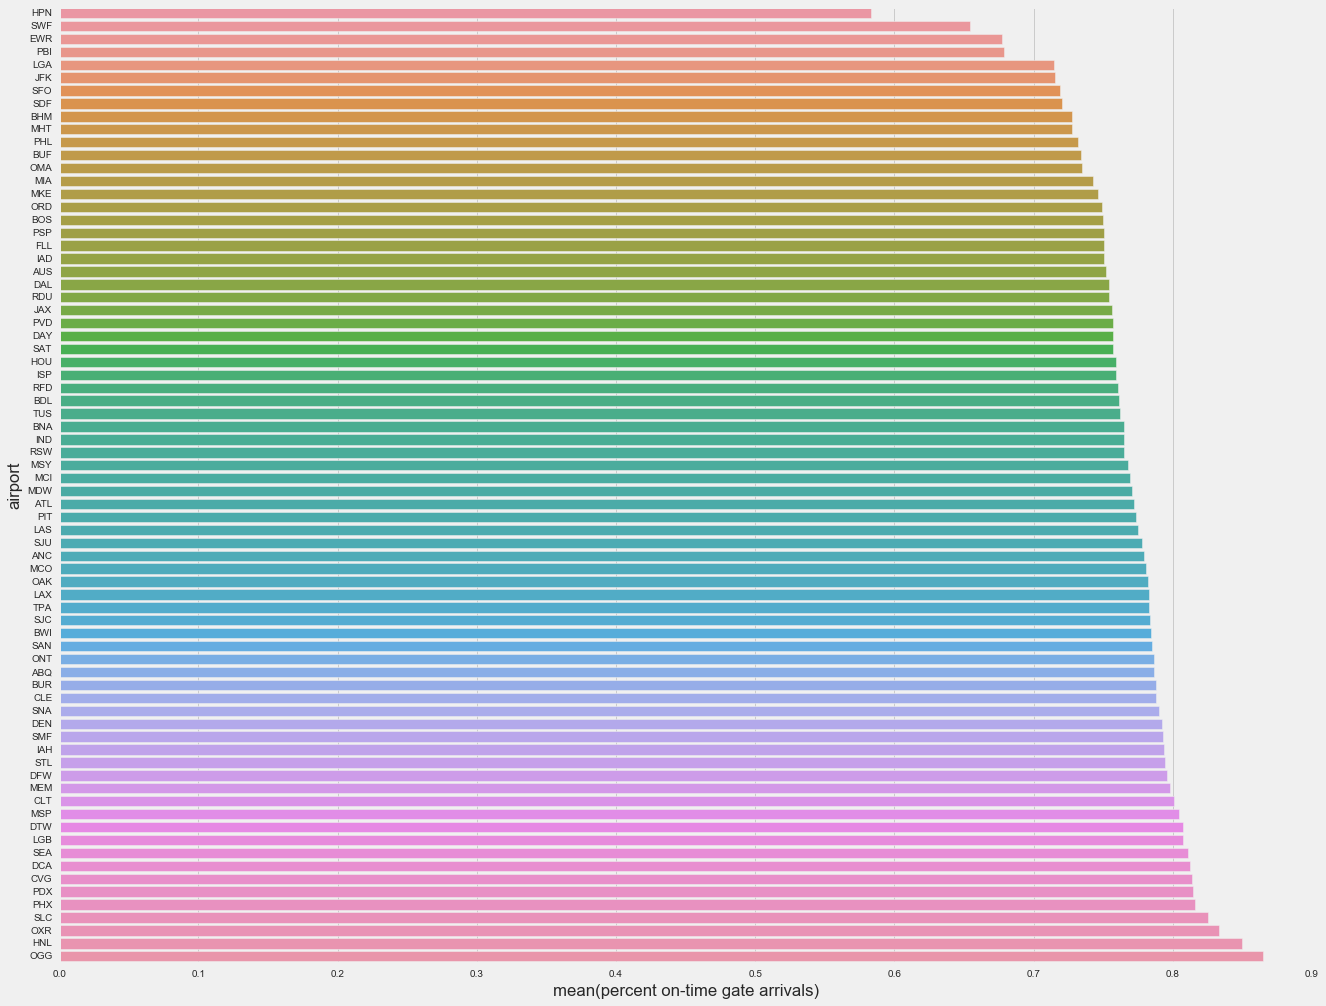

In [33]:
import matplotlib as plt

decade_agg_ap['airport'] = decade_agg_ap.index
# decade_agg_ap
plt.style.use('fivethirtyeight')

# fig, ax = plt.subplots(figsize=(16,16))
decade_agg_ap.sort_values(by=['percent on-time gate arrivals'],axis=0, inplace=1)

# sns.barplot(decade_agg_ap['percent on-time gate arrivals'],decade_agg_ap['airport'], hue=decade_agg_ap['Arrival Cancellations'])
sns.barplot(decade_agg_ap['percent on-time gate arrivals'],decade_agg_ap['airport'],)
fig = plt.pyplot.gcf()
fig.set_size_inches(20, 16)
fig.savefig('test2png.png', dpi=100)

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: When reducing the dimensionality of the underlying dataset, we lose relative feature importance and, therefore, interpretability. Additionally, although it is a matter of preference and is specific to the methodology of a given context, by including variables that are highly correlated with one another, we may be over-emphasizing the dimension of the shared "underlying factor" that is influencing multiple features (in contrast, this may also provide precision, depending on the context of the problem.  

#### 4.4 Validate your findings using statistical analysis

In [34]:
df.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,airport_num,diff_gate_airport_departures
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,...,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44,0.0221
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,...,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44,0.0218
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,...,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44,0.0227
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,...,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44,0.0301
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,...,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes,44,0.0259


In [35]:
df['delay_score'] = ((1-df['percent on-time airport departures'])-df['percent on-time gate arrivals'])*(df['average airport departure delay']-df['average gate arrival delay'])

In [36]:
df['net_lateness_percent'] = ((1-df['percent on-time airport departures'])-(1-df['percent on-time gate arrivals']))

In [37]:
df['avg_delay_late_control'] = (df['average airport departure delay']+df['average airborne delay']+df['average taxi out delay']-df['average gate arrival delay'])

In [38]:
'average airport departure delay', 'average block delay', 'average airborne delay'

('average airport departure delay',
 'average block delay',
 'average airborne delay')

In [39]:
df['net_cancelations']= df['Departure Cancellations'] - df['Arrival Cancellations']
df['net_diversions']= df['Departure Diversions'] - df['Arrival Diversions']

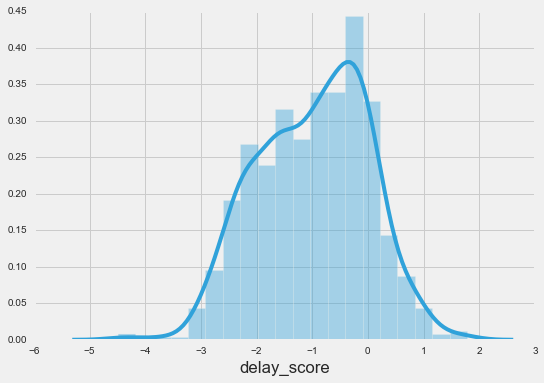

In [40]:
sns.distplot(df['delay_score'])

Based on the above plot (where the more positive, the better performance) it appears that delays

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

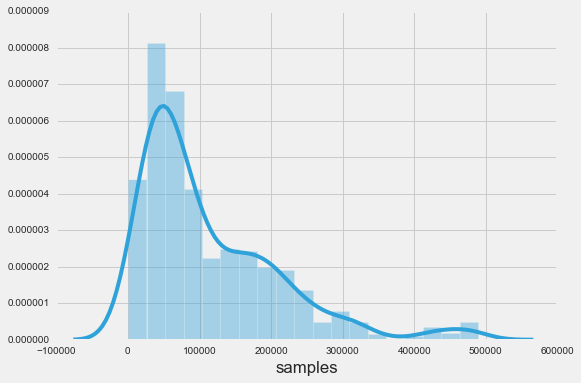

In [41]:
df['delay_score']

df['samples'] = ((df['departures for metric computation'] + df['arrivals for metric computation'])/2)
sns.distplot(df['samples'])

In [42]:
df[df['samples']>100] # all these super low samples are commercial, let's leave them in and hope we differentiate
#also, its clear that AP type is really important - let's make dummies for those

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,...,Longitude,Boundary Data Available,airport_num,diff_gate_airport_departures,delay_score,net_lateness_percent,avg_delay_late_control,net_cancelations,net_diversions,samples
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,...,-106.609194,Yes,44,0.0221,-0.704790,0.0112,6.12,7,25,53894.5
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,...,-106.609194,Yes,44,0.0218,-0.568608,0.0079,5.51,31,28,51853.0
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,...,-106.609194,Yes,44,0.0227,-0.280602,-0.0010,4.79,63,-53,50440.5
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,...,-106.609194,Yes,44,0.0301,-0.128424,-0.0057,4.83,62,62,53433.0
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,...,-106.609194,Yes,44,0.0259,-0.480396,0.0031,5.07,33,37,49550.5
5,ABQ,2009,42550,42704,0.8341,0.8147,0.8224,9.24,9.88,1.89,...,-106.609194,Yes,44,0.0194,-0.751778,0.0077,4.81,30,48,42627.0
6,ABQ,2010,42302,42169,0.8144,0.7907,0.8047,10.25,9.95,2.05,...,-106.609194,Yes,44,0.0237,-0.803790,0.0140,5.06,45,21,42235.5
7,ABQ,2011,42283,42297,0.8072,0.7758,0.8022,10.81,10.50,2.51,...,-106.609194,Yes,44,0.0314,-1.121320,0.0264,6.03,51,16,42290.0
8,ABQ,2012,39105,39107,0.8219,0.7940,0.8177,10.55,10.27,2.32,...,-106.609194,Yes,44,0.0279,-1.455846,0.0237,6.11,56,5,39106.0
9,ABQ,2013,35277,34989,0.7710,0.7402,0.7554,12.56,10.77,2.64,...,-106.609194,Yes,44,0.0308,-0.753312,0.0152,5.76,20,16,35133.0


In [43]:
df['AP Type'].value_counts() #definitely worth including, values for all 799 rows


Federalized/Commercial    748
Public Use                 51
Name: AP Type, dtype: int64

In [44]:
len(df[df['samples']>100])

799

In [45]:

ap_type_dums = pd.get_dummies(df['AP Type'])
df = pd.concat([df,ap_type_dums], axis = 1)

# ['samples', 'Public Use', 'Ferderalized/Commercial']

In [46]:
ap_type_dums

,Federalized/Commercial,Public Use
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [47]:
from sklearn import preprocessing



unscaled_x = df.loc[:,['year','percent on-time gate departures','percent on-time airport departures', 'percent on-time gate arrivals','average_gate_departure_delay', 'average_taxi_out_time','average taxi out delay', 'average airport departure delay','average airborne delay', 'average taxi in delay','average block delay', 'average gate arrival delay', 'Latitude','Longitude', 'net_cancelations', 'net_diversions','samples', 'Public Use', 'Federalized/Commercial']]

X_orig = preprocessing.StandardScaler().fit_transform(unscaled_x)
X_orig = pd.DataFrame(X_orig, columns=unscaled_x.columns)

y = df['airport_num']
y_temp = df['delay_score']



In [48]:
rfc_cv = RandomForestRegressor(n_estimators=1000) #
stratk = StratifiedKFold(y_temp, n_folds=10, shuffle=True, random_state=66)

rfc_cv.fit(X_orig, y_temp)
s_rfc = cross_val_score(rfc_cv, X_orig, y_temp, cv=stratk, n_jobs=-1).mean()
s_rfc



/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.89439560563453013

In [49]:
feature_importances_rfc = pd.DataFrame(rfc_cv.feature_importances_,
                                   index = X_orig.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances_rfc.head(35)

,importance
samples,0.364515
Longitude,0.098826
percent on-time gate arrivals,0.097690
average gate arrival delay,0.096686
percent on-time airport departures,0.088795
average airport departure delay,0.065534
average block delay,0.032007
average_gate_departure_delay,0.031778
average taxi out delay,0.020750
Latitude,0.019087


In [50]:
#because federal v. public airports are not predictive at all on the amount of lateness, seems like I should focus my analysis on non-public airports
#Looking online, I was unable to find a clear difference between 2 groups, so dropping as features (airports seem to be divided in other ways online)

# removed: 'Public Use', 'Federalized/Commercial'

features = df.loc[:,['year','avg_delay_late_control', 'net_lateness_percent', 'Latitude','Longitude', 'net_cancelations', 'net_diversions','samples']]
X = preprocessing.StandardScaler().fit_transform(features)
X = pd.DataFrame(X, columns=features.columns)

In [51]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
xPC_2 = pca_2.fit_transform(X) # Use the eigenvectors to transform xStand onto new axes
print pca_2.fit(X).components_# eigenvectors



[[ 0.04403301 -0.51738054 -0.5164958  -0.14685512 -0.17392922  0.36223268
   0.20287415 -0.489308  ]
 [-0.01221021  0.21764529  0.11837381  0.13092501  0.60358192  0.56268371
  -0.35331277 -0.33996135]]


In [52]:
from sklearn.decomposition import PCA

pca_3 = PCA(n_components=3)
xPC_3 = pca_3.fit_transform(X) # Use the eigenvectors to transform xStand onto new axes
print pca_3.fit(X).components_# eigenvectors


[[ 0.04403301 -0.51738054 -0.5164958  -0.14685512 -0.17392922  0.36223268
   0.20287415 -0.489308  ]
 [-0.01221021  0.21764529  0.11837381  0.13092501  0.60358192  0.56268371
  -0.35331277 -0.33996135]
 [ 0.54643499 -0.00291863  0.05305829  0.66450567  0.12728359 -0.02252715
   0.48607349 -0.06357118]]


In [53]:
df_pca_2 = pd.DataFrame(xPC_2, columns=['PC1','PC2'])
# len(df_pca_2) #799, as expected
df_pca_labeled_full = pd.merge(df_pca_2, df, left_index=1, right_index=1)
df_pca_labeled = df_pca_labeled_full.iloc[:,:3]
df_pca_labeled.head()

,PC1,PC2,airport
0,1.024396,-0.239258,ABQ
1,1.190435,-0.208007,ABQ
2,1.296620,0.063480,ABQ
3,1.519790,-0.285393,ABQ
4,1.351652,-0.260115,ABQ


In [54]:
df_pca_3 = pd.DataFrame(xPC_3, columns=['PC1','PC2', 'PC3']) #for use in analysis
df_pca3_labeled_full = pd.merge(df_pca_3, df, left_index=1, right_index=1)
df_pca3_labeled = df_pca3_labeled_full.iloc[:,:4]
df_pca_3.head() 

,PC1,PC2,PC3
0,1.024396,-0.239258,-0.995192
1,1.190435,-0.208007,-0.814328
2,1.296620,0.063480,-0.964968
3,1.519790,-0.285393,-0.353155
4,1.351652,-0.260115,-0.261957


In [55]:
df_pca3_labeled.head() #for visualizations later

,PC1,PC2,PC3,airport
0,1.024396,-0.239258,-0.995192,ABQ
1,1.190435,-0.208007,-0.814328,ABQ
2,1.296620,0.063480,-0.964968,ABQ
3,1.519790,-0.285393,-0.353155,ABQ
4,1.351652,-0.260115,-0.261957,ABQ


In [56]:
# sns.regplot(data=df_pca_2,x='PC1', y='PC2')
# plt.style.use('fivethirtyeight')

In [58]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
metrics.silhouette_score(X, labels, metric='euclidean')


0.19676165472027515

In [59]:
kmeans3 = KMeans(n_clusters=3)
clusters3 = kmeans3.fit(X)
labels3 = kmeans3.labels_
centroids3 = kmeans3.cluster_centers_
metrics.silhouette_score(X, labels3, metric='euclidean')

0.19455856807973365

In [60]:
kmeans10 = KMeans(n_clusters=10)
clusters10 = kmeans10.fit(X)
labels10 = kmeans10.labels_
centroids10 = kmeans10.cluster_centers_
metrics.silhouette_score(X, labels10, metric='euclidean')

0.21961041421335356

In [61]:
#now assessing PCA results

kmeans3pca = KMeans(n_clusters=4)
clusters3pca = kmeans3pca.fit(df_pca_2)
labels3pca = kmeans3pca.labels_
centroids3pca = kmeans3pca.cluster_centers_
metrics.silhouette_score(df_pca_2, labels3pca, metric='euclidean')

0.37298216145135715

In [62]:
kmeans4 = KMeans(n_clusters=4)
clusters4 = kmeans4.fit(df_pca_2)
labels4 = kmeans4.labels_
centroids4 = kmeans4.cluster_centers_
metrics.silhouette_score(df_pca_2, labels4, metric='euclidean')

0.37199877512134766

In [63]:
kmeans_pca = KMeans(n_clusters=5)
clusters_pca = kmeans_pca.fit(df_pca_2)
labels_pca = kmeans_pca.labels_
centroids_pca = kmeans_pca.cluster_centers_
metrics.silhouette_score(df_pca_2, labels_pca, metric='euclidean')

0.39642807743482894

In [64]:
kmeans6 = KMeans(n_clusters=6)
clusters6 = kmeans6.fit(df_pca_2)
labels6 = kmeans6.labels_
centroids6 = kmeans6.cluster_centers_
metrics.silhouette_score(df_pca_2, labels6, metric='euclidean')

0.37257736340524894

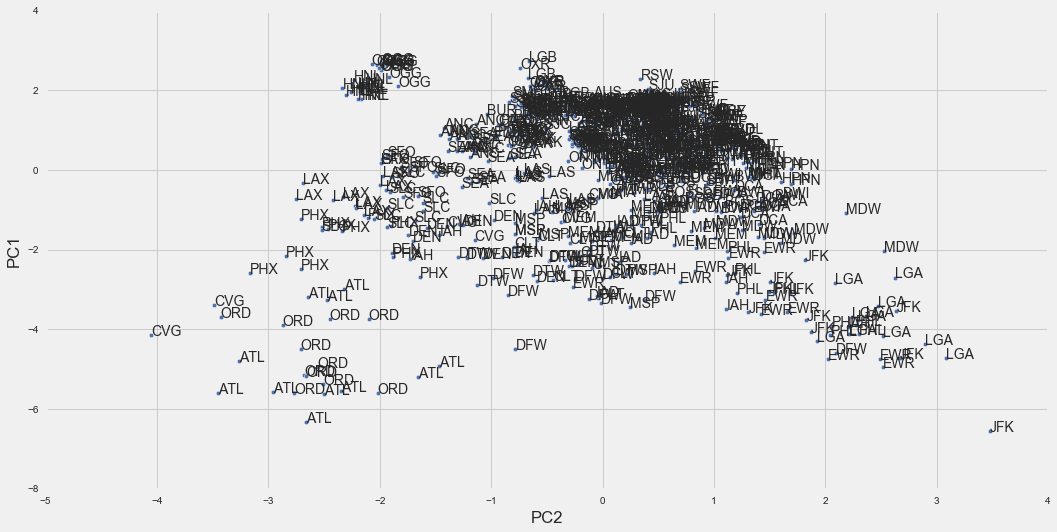

In [65]:
df_pca_2['cluster'] = pd.Series(clusters_pca.labels_)
plt.style.use('fivethirtyeight')

graph = df_pca_2.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, airport in enumerate(df_pca_labeled['airport']):
    graph.annotate(airport, (df_pca_2.iloc[i].PC2, df_pca_2.iloc[i].PC1))


Stopping Point: Future Analysis

Next, I will implement:

heirarchical clustering
random forest classification (with feature importance to inform other analysis)
t-SNE (to see if more obvious clusters emerge)

Then, next goal is to determine number of clusters -- especially if unclear above (using the full dataset). I will do 2 methods and compare them:

DBscan (grid-search optimized w/ silouette score)

Once I have determined my number of clusters, I will perform the following on both PCA and full(scaled) features:

Finally, try to visualize best clusters with best siluette


### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

In [66]:
#heirarchical

from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
c

0.51670764816028125

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

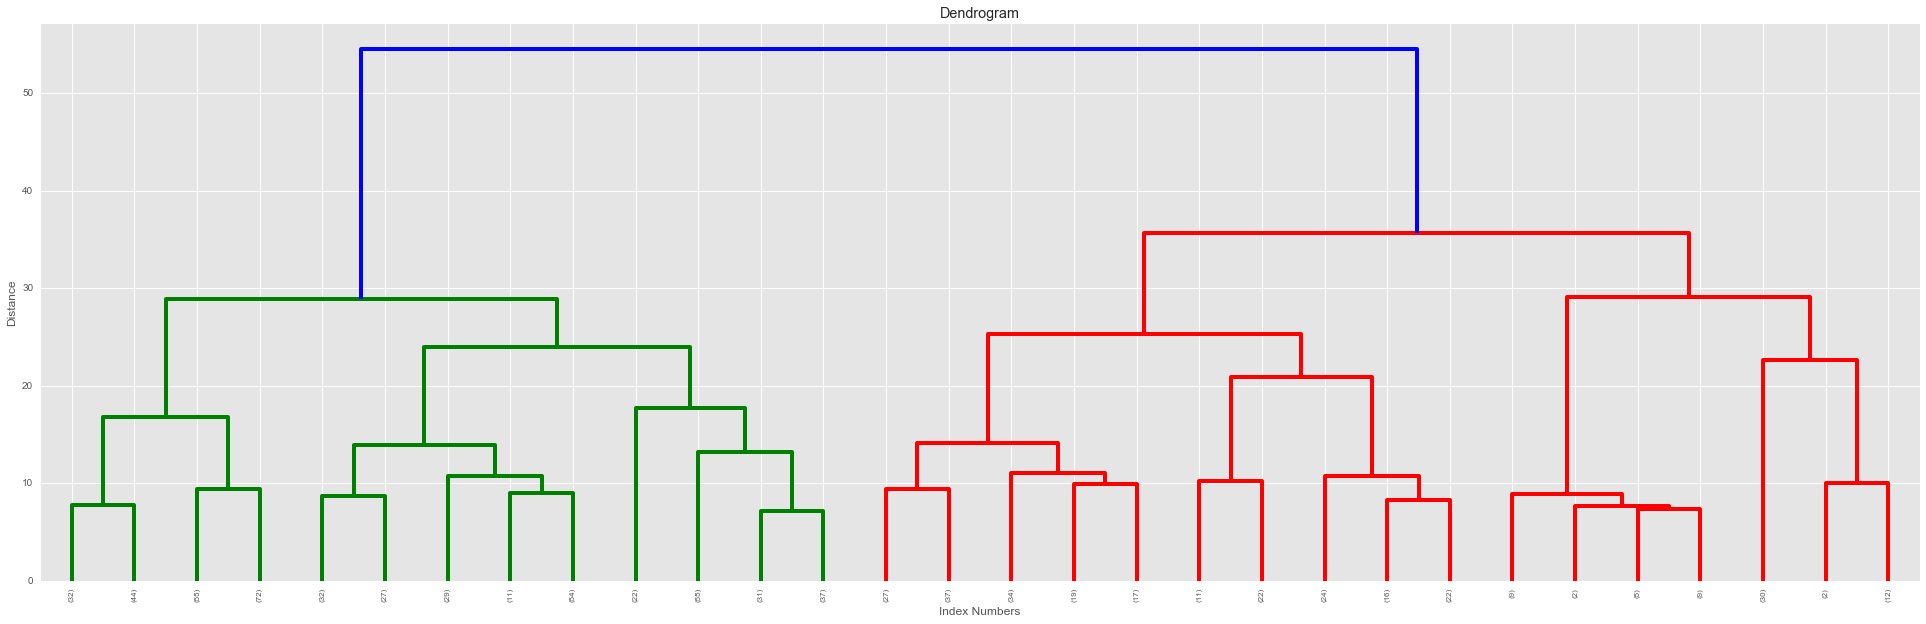

In [67]:

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
%matplotlib inline


plt.figure(figsize=(30, 10))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
    truncate_mode='lastp')

plt.show()

In [ ]:
#looks like 3 clusters will be reasonable given the above visualization. What does t-SNE think?
#this confirms the Kmeans silouettes scores

In [91]:
#edited plit imbedding

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    fig = plt.figure(figsize=(15,8))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(df_pca_labeled['airport'][i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(df_pca_labeled['airport'].shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(df_pca_labeled['airport'][i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [92]:
def scatter_basic(x):
    # We choose a color palette with seaborn.
    palette = sns.color_palette("GnBu_d")

    # We create a scatter plot.
    plt.style.use('fivethirtyeight')
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.show()


    return f, ax, sc



In [93]:
# original version of plot_embedding
# def plot_embedding(X, title=None):
#     x_min, x_max = np.min(X, 0), np.max(X, 0)
#     X = (X - x_min) / (x_max - x_min)

#     fig = plt.figure(figsize=(15,8))
#     ax = plt.subplot(111)
#     for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(df['airport_num'][i]),
#                  color=plt.cm.Set1(y[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(df['airport_num'].shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(df['airport_num'][i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
#     plt.xticks([]), plt.yticks([])
#     if title is not None:
#         plt.title(title)

Computing t-SNE embedding


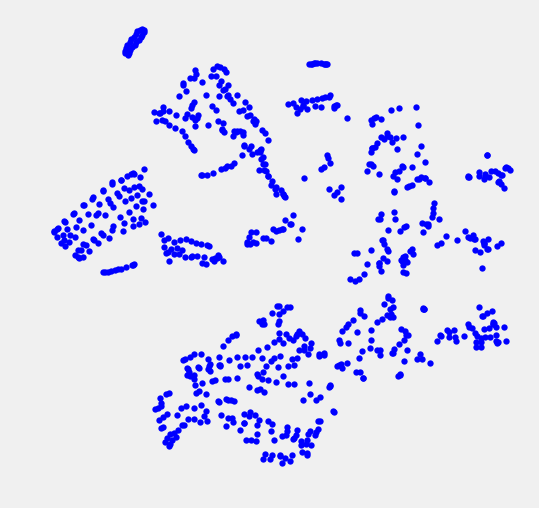

(<matplotlib.figure.Figure at 0x12f1e7990>,
 <matplotlib.collections.PathCollection at 0x12f1e5f90>)

In [94]:
# t-SNE 
from time import time
from scipy.cluster import hierarchy


print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=5)
X_tsne = tsne.fit_transform(X)
scatter_basic(X_tsne)

#this plot seems to support more than three groupings

In [95]:


X.iloc[220:244,:]

,year,avg_delay_late_control,net_lateness_percent,Latitude,Longitude,net_cancelations,net_diversions,samples
220,-1.593401,2.882814,1.921878,0.635037,1.004811,-0.288812,-1.010199,0.998431
221,-1.275754,2.545631,1.599715,0.635037,1.004811,-0.165575,-1.264750,0.996079
222,-0.958108,3.838166,2.670541,0.635037,1.004811,-0.263138,-3.293203,1.029724
223,-0.640461,3.766466,2.646745,0.635037,1.004811,-0.124496,-2.998878,0.971099
224,-0.322815,3.807160,2.990873,0.635037,1.004811,-0.283677,-1.789761,0.955565
225,-0.005168,2.661901,2.461867,0.635037,1.004811,-0.011529,-1.113610,0.843278
226,0.312478,1.394558,1.288535,0.635037,1.004811,-0.011529,-0.763603,0.805124
227,0.630125,1.408123,0.765020,0.635037,1.004811,0.096303,-1.662486,0.807885
228,0.947771,1.846073,1.636325,0.635037,1.004811,-0.268272,0.008004,0.842087
229,1.265418,1.630974,1.612528,0.635037,1.004811,-0.961479,-0.851105,0.839572


In [96]:
#t-SNE resources for troubleshooting visualization errors: https://indico.io/blog/visualizing-with-t-sne/
#https://gist.github.com/lukemetz/be6123c7ee3b366e333a

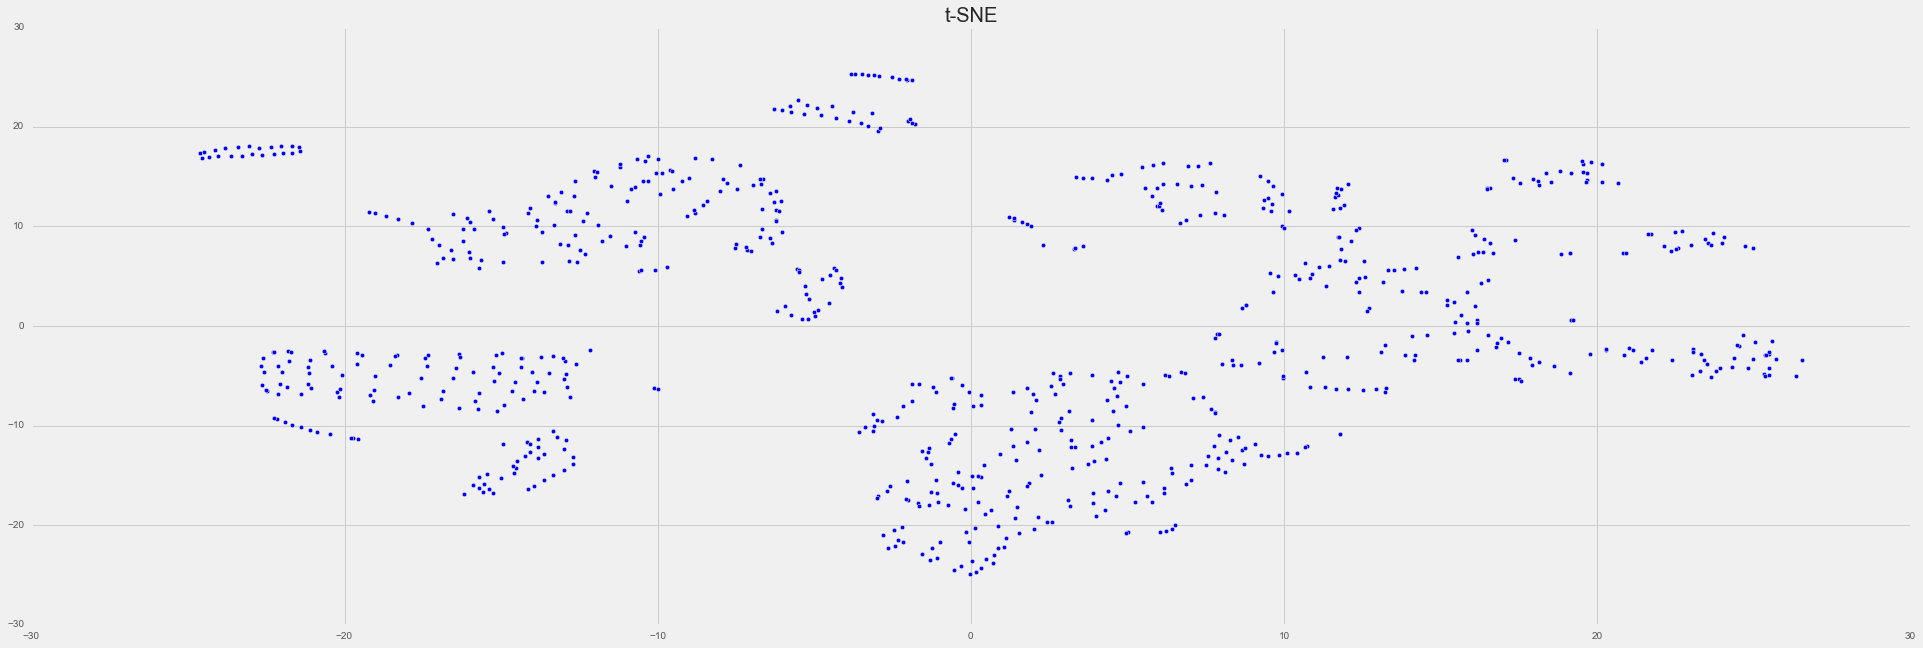

In [97]:
from tsne import bh_sne
X_2d = bh_sne(X)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 10))
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.title('t-SNE')
plt.xlabel('')
plt.ylabel('')
# plt.plot(X_2d)
# plt.show()

In [98]:
X_2d[1,1]

6.5420162655397389

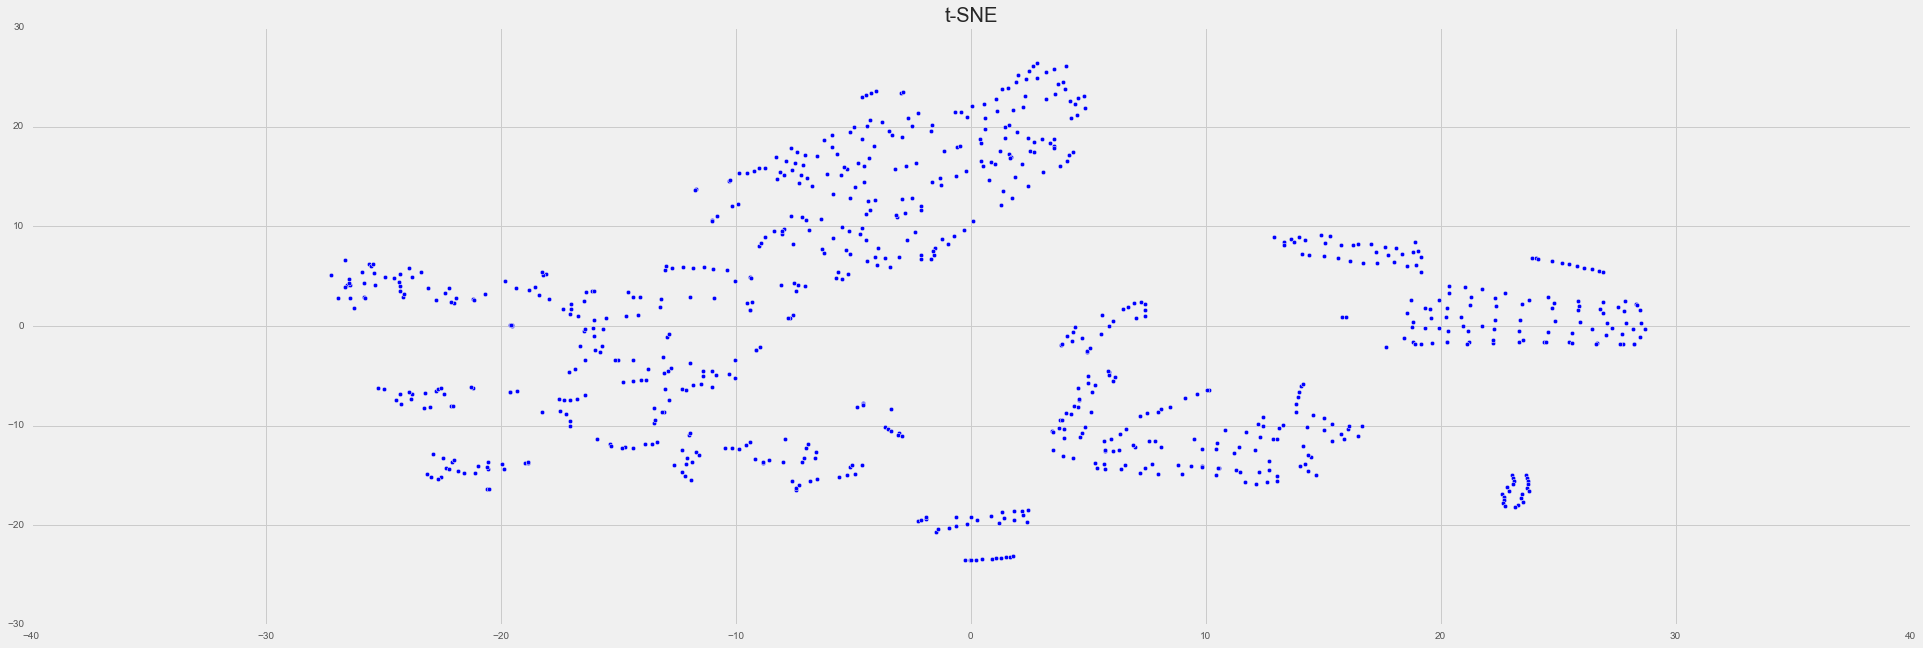

In [99]:
X_2d = bh_sne(X)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 10))
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.title('t-SNE')
plt.xlabel('')
plt.ylabel('')

for i, airport in enumerate(df_pca_labeled['airport']):
    graph.annotate(airport, (X_2d[i,1], X_2d[i,0]))

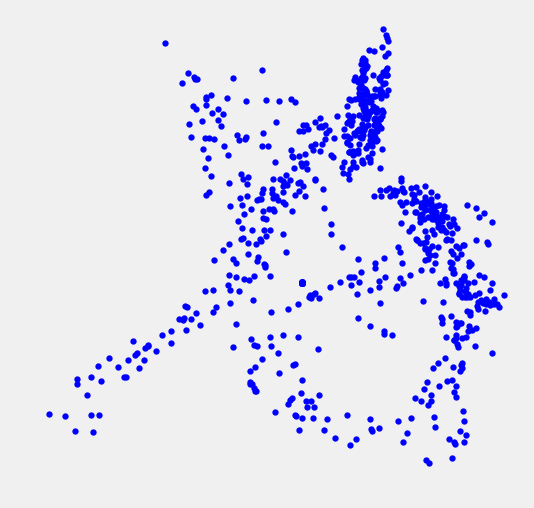

(<matplotlib.figure.Figure at 0x129dd0ed0>,
 <matplotlib.collections.PathCollection at 0x130ec2f90>)

In [100]:
# Isomap 
n_neighbors = 6
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
scatter_basic(X_iso)

(-25, 25)

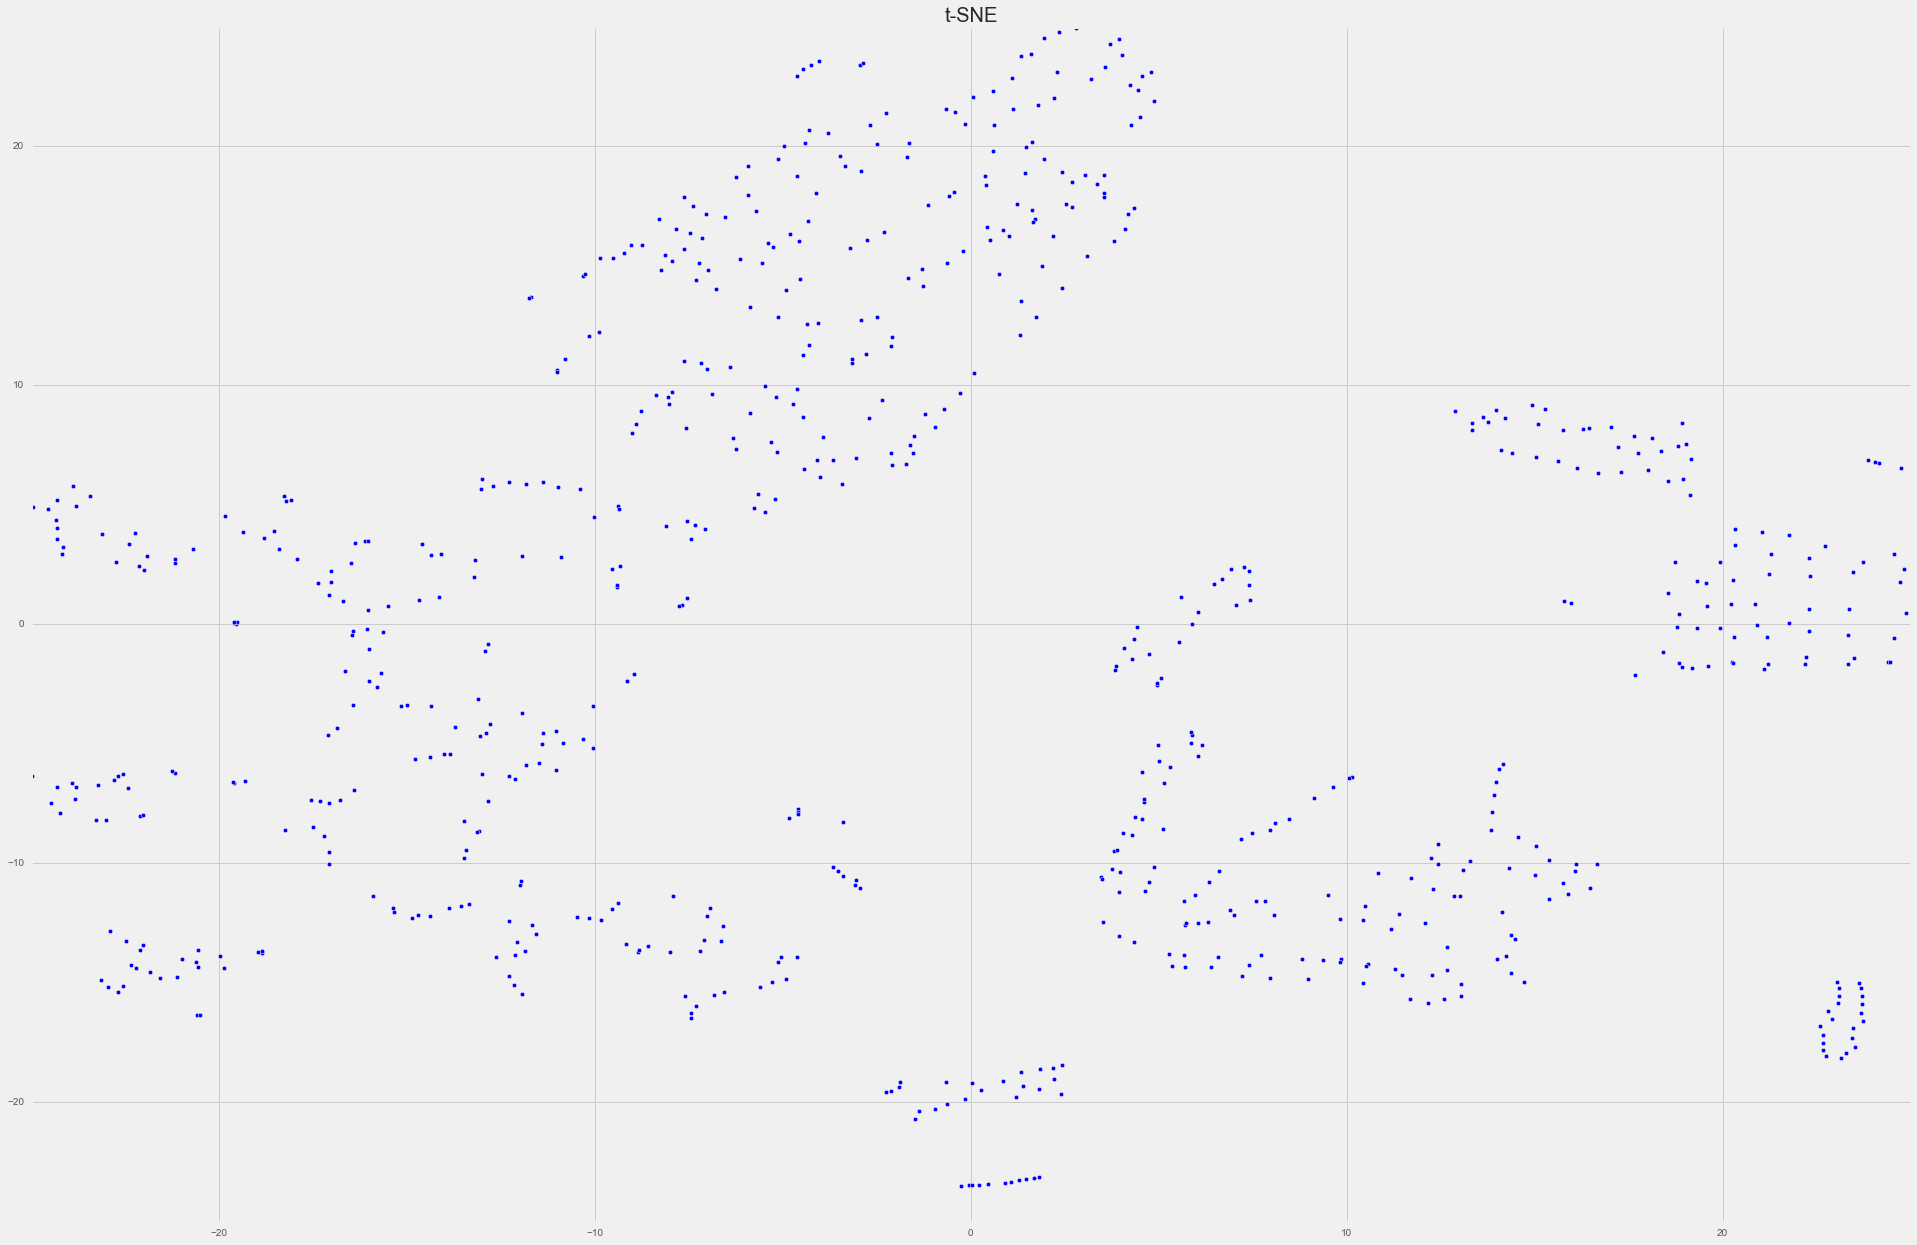

In [102]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 20))
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.title('t-SNE')
plt.xlabel('')
plt.ylabel('')
plt.xlim([-25,25])
plt.ylim([-25,25]) #4 clusters here?


In [73]:
from sklearn.cluster import DBSCAN, KMeans

db1 = DBSCAN(eps = 1, min_samples = 5).fit(X)  
db1labels = db1.labels_  
core_samples = db1.core_sample_indices_

db1labels #too many


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  3,  3,  3, -1, -1, -1, -1,  0,  0, -1,  0, -1,
       -1, -1, -1, -1,  4

In [74]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f" #what does negative mean???
      % silhouette_score(X, db1labels))

Silhouette Coefficient: -0.019


0.271679338312


In [79]:
db2 = DBSCAN(eps = 3, min_samples = 10).fit(X)  #
db2labels = db2.labels_  
core_samples = db2.core_sample_indices_


print("Silhouette Coefficient: %0.3f" #this is returning all zeros (which yields a killer silhouette...)
      % silhouette_score(X, db2labels))

Silhouette Coefficient: 0.625


In [80]:
set(db2labels) #too few

{-1, 0}

In [81]:
db3 = DBSCAN(eps = 1, min_samples = 10).fit(xPC_2)  #
db3labels = db3.labels_  
core_samples = db3.core_sample_indices_


print("Silhouette Coefficient: %0.3f" #progress!
      % silhouette_score(X, db3labels))

Silhouette Coefficient: 0.272


In [136]:
db4 = DBSCAN(eps = .75, min_samples = 5).fit(xPC_3)  #
db4labels = db4.labels_  
core_samples = db4.core_sample_indices_


print("Silhouette Coefficient: %0.3f" #this is returning all zeros (which yields a killer silhouette...)
      % silhouette_score(X, db4labels))

Silhouette Coefficient: 0.256


In [123]:
set(db4labels) # 5 clusters here

{-1, 0, 1}

In [84]:
set(db3labels) #4 clusters as well


{-1, 0, 1, 2}

In [90]:
rfc = RandomForestRegressor(n_estimators=1000) #
stratk = StratifiedKFold(y_temp, n_folds=10, shuffle=True, random_state=66)

rfc.fit(X, db4labels)
s_rfc = cross_val_score(rfc, X, db4labels, cv=stratk, n_jobs=-1).mean()

feature_importance_rfc = pd.DataFrame(rfc.feature_importances_,
                                   index = features.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importance_rfc.head(35) #first time running this, i kepy federalized and public use categories in, and they dominated the clustering, so i removed them



,importance
samples,0.447061
Longitude,0.348810
net_cancelations,0.082615
net_diversions,0.069878
net_lateness_percent,0.014595
Latitude,0.013999
avg_delay_late_control,0.012591
year,0.010453


In [ ]:
from sklearn.grid_search import GridSearchCV

eps_vals = [0.1, 0.3, 0.5, 0.75, .9, 1.25, 1.5, 2, 3]
min_samples = [3,5,6,7,8,9,10,11,12, 15]

gs = GridSearchCV(db3, {'eps': eps_vals, 'min_samples': min_samples}, verbose=False, cv=stratk)
# dbgs2labels = gs.labels_
gs.fit(xPC_3, score=silhouette_score(X, gs.labels_))
gs.best_params_

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

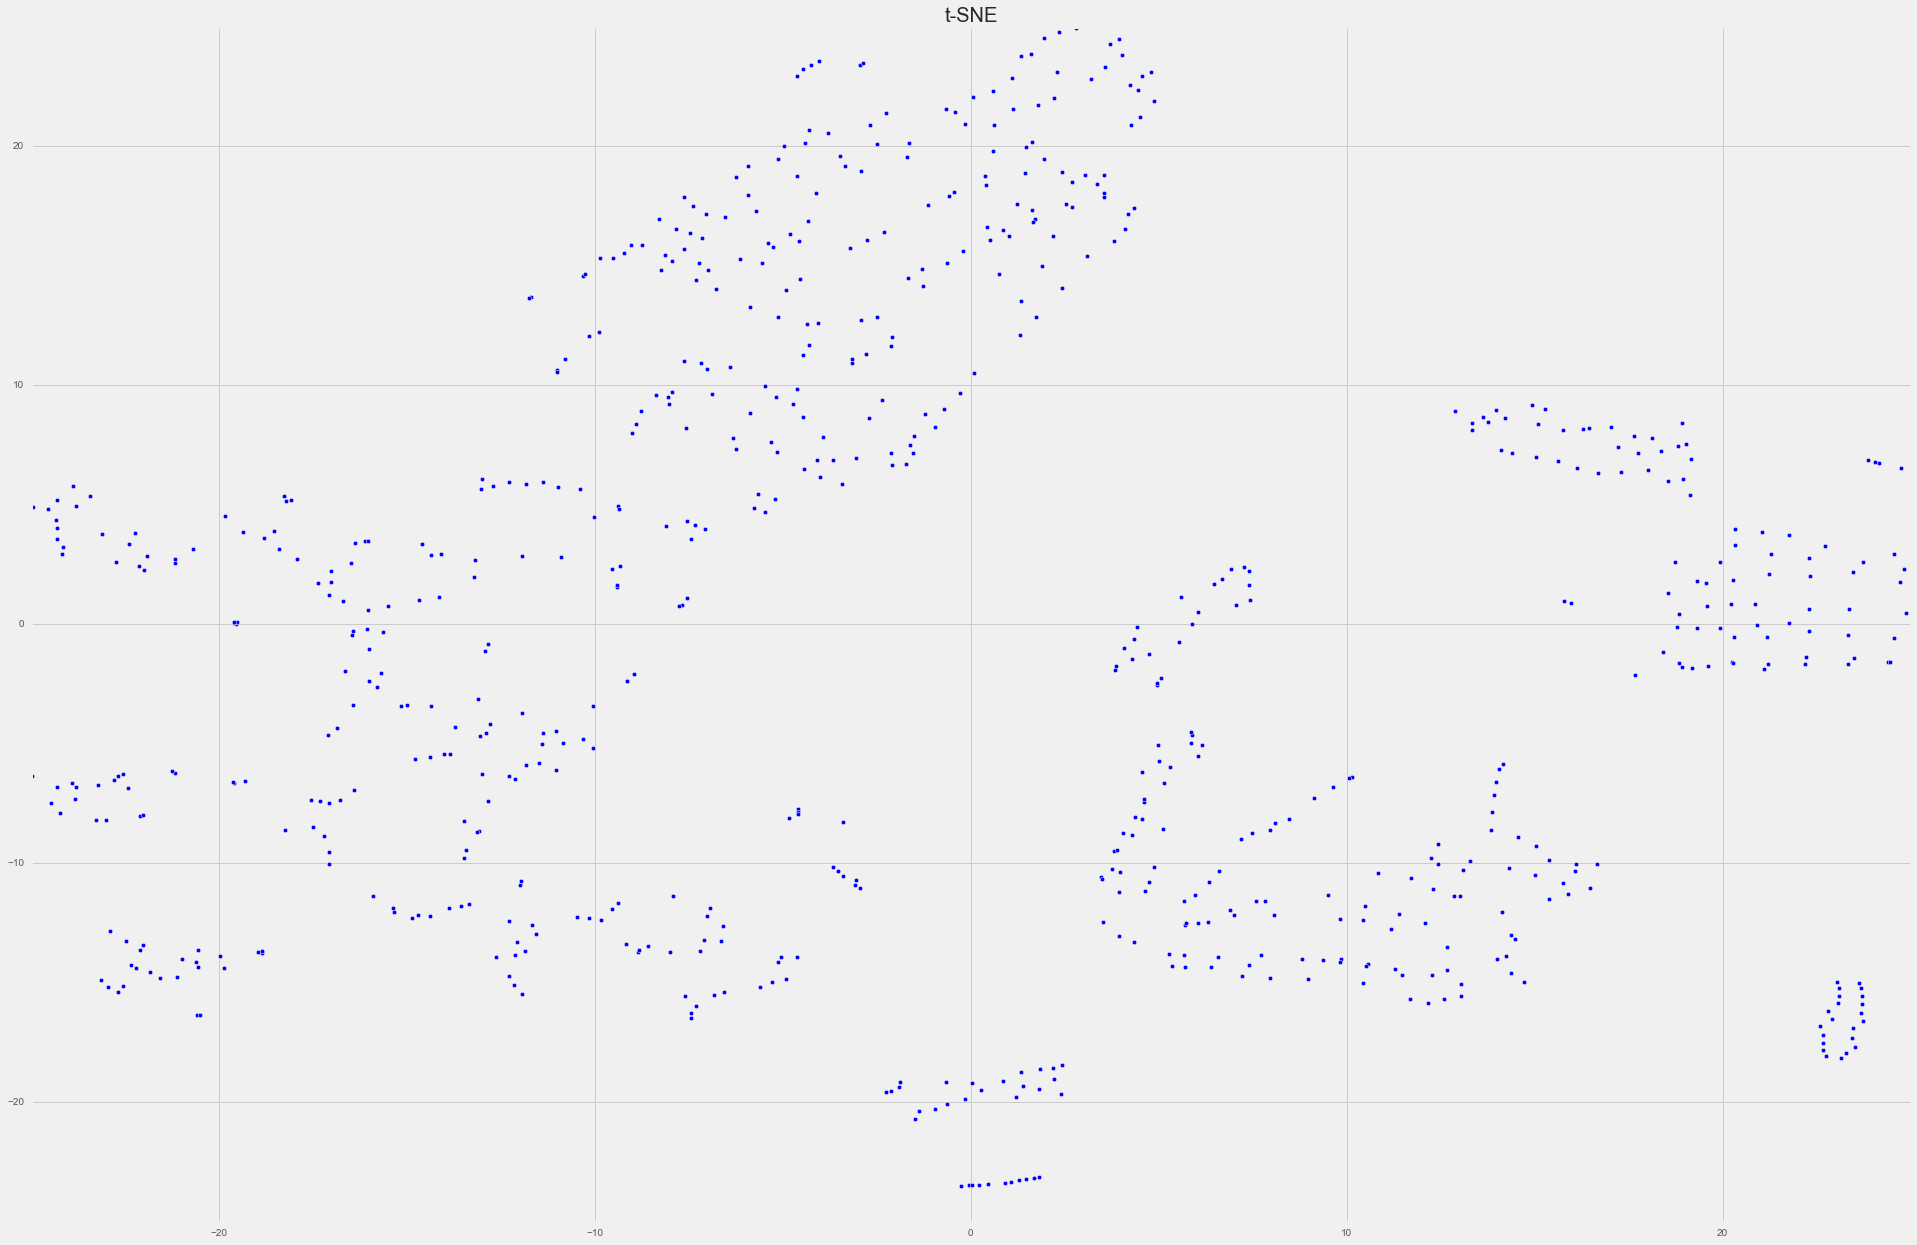

In [104]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 20))
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.title('t-SNE')
plt.xlabel('')
plt.ylabel('')
plt.xlim([-25,25])
plt.ylim([-25,25]) #4 clusters here?


for i, label in enumerate(db4labels['airport']):
    graph.annotate(label, (X_2d.iloc[i,0],X_2d.iloc[i,1]))

In [114]:
print(len(X_2d), len(db4labels))

(799, 799)


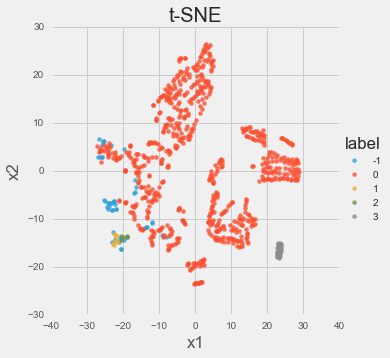

In [137]:
X_2d = pd.DataFrame(X_2d)
db4labels = pd.DataFrame(db4labels)


plotdf = X_2d.merge(db4labels, how='left', left_index=1, right_index=1)
# plotdf = pd.merge(X_2d, db4labels, how='left', left_index=1, right_index=1)

plotdf.columns = ['x1', 'x2', 'label']

plt.figure(figsize=(30, 20))
sns.lmplot('x1','x2', data=plotdf, hue='label', legend=1, fit_reg=0)
plt.title('t-SNE')            


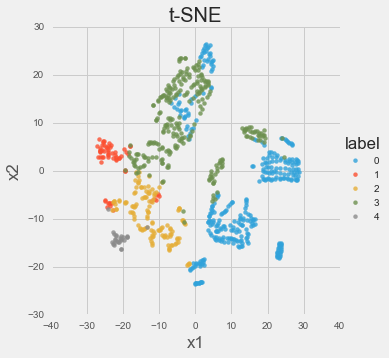

In [138]:
labels_pca

labels_pca = pd.DataFrame(labels_pca)


plotdf2 = X_2d.merge(labels_pca, how='left', left_index=1, right_index=1)
# plotdf = pd.merge(X_2d, db4labels, how='left', left_index=1, right_index=1)

plotdf2.columns = ['x1', 'x2', 'label']

plt.figure(figsize=(30, 20))
sns.lmplot('x1','x2', data=plotdf2, hue='label', legend=1, fit_reg=0)
plt.title('t-SNE')   

In [ ]:
#tree/ random forest model predicting df['percent on-time airport departures'] and extract feature importance

### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

Which operational features are most correlated with delays?

What should the airport's next steps be?

### Bonus: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied